# Assignment: CERES data

To solve the following exercises you can copy and paste code from the previous notebook. The code modifications required to solve the exercises are minimal (e.g. changing the name of a variable, add a small computation...): don't think too "complicated"!

## Importing the modules

This one is easy. I'll do it for you:

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## TOA fluxes 

Read the TOA dataset we used during the lesson. Do you remember all variables it contains?

In [2]:
ds = xr.open_dataset(r'C:\Users\david\unixstuff\AtmosphericSciencesShare\ClimateSystem\Africa_MJM\LectureNotebooks\Week02\CERES_EBAF-TOA_Ed4.1_Clim-2005-2015.nc')
# Your answer here
ds

<xarray.Dataset>
Dimensions:            (lon: 360, lat: 180, month: 12)
Coordinates:
  * lon                (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat                (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * month              (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    toa_sw_all_clim    (month, lat, lon) float32 ...
    toa_lw_all_clim    (month, lat, lon) float32 ...
    toa_sw_clr_c_clim  (month, lat, lon) float32 ...
    toa_lw_clr_c_clim  (month, lat, lon) float32 ...
    solar_clim         (month, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

### Albedo 

Compute the climatological mean of clear-sky planetary albedo $\overline{\alpha_{P_{clr}}}$ and plot it on a map. Analyse the plot.

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:982: ShapelyDeprecationWarning: Ite

Text(0.5, 1.0, 'Clear sky planetary albedo $\\overline{\\alpha_{P_{clr}}}$ for SW radiation')

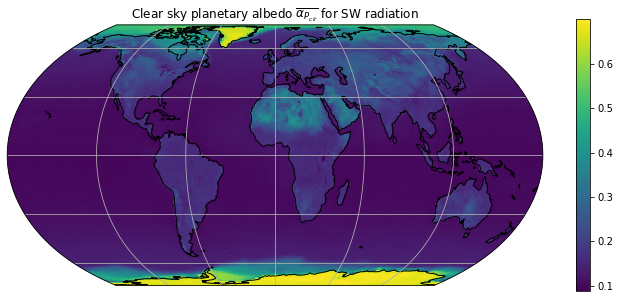

In [3]:
# claculation: clear-sky albedo = SW_out_clr_sky/SW_in
clr_sky_avg_alb = ds.toa_sw_clr_c_clim.mean(dim = "month")/ds.solar_clim.mean(dim = "month") 

# plot the surface map
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
clr_sky_avg_alb.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title(r'Clear sky planetary albedo $\overline{\alpha_{P_{clr}}}$ for SW radiation') # Add gridlines and coastlines to the plot

Oceans and lakes have the lowest albedo. Then comes rainforests other wood and grass land. Later then desterts and ice covered areas with the highest albedo.
The higher the albedo, the more SW-Radiation is refelcted.

Repeat the operation with all-sky planetary albedo $\overline{\alpha_{P_{all}}}$. Where are the largest differences? Can you plot the difference between the two on a map, too?

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:982: ShapelyDeprecationWarning: Ite

Text(0.5, 1.0, 'All-sky planetary albedo $\\overline{\\alpha_{P_{all}}}$ for SW radiation')

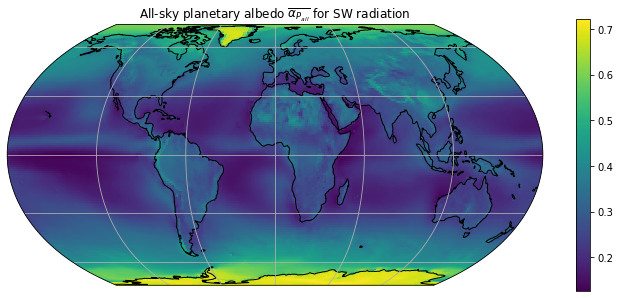

In [4]:
# claculation: all-sky albedo = SW_out_all_sky/SW_in
all_sky_avg_alb = ds.toa_sw_all_clim.mean(dim = "month")/ds.solar_clim.mean(dim = "month")

# plot the surf map: 
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
all_sky_avg_alb.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines();  plt.title(r'All-sky planetary albedo $\overline{\alpha_{P_{all}}}$ for SW radiation') # Add gridlines and coastlines to the plot

The largest difference to the clear sky albedo of the earth surface is in the tropics or more in the ITCZ, where many high clouds increase the reflectivity of the atmosphere. Also in the regions of the westerlies where lot of cyclogenesis occures many clouds increase the reflectivity
At the poles and desert regions the difference is the smalest because these regions are mainly cloudfree.

Text(0.5, 1.0, 'Difference between $\\overline{\\alpha_{P_{clr}}}$ and $\\overline{\\alpha_{P_{all}}}$ for SW radiation ')

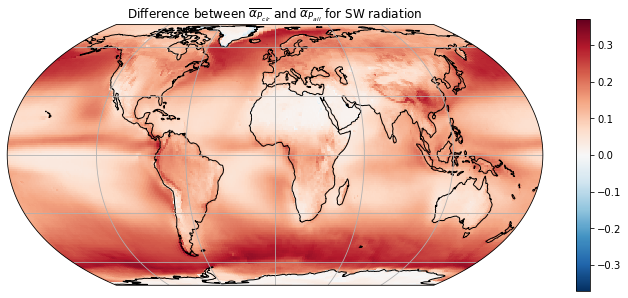

In [5]:
# to see the differeces between clear sky albedo and the all climate albedo we plot this with following calculation
delta_albedo = all_sky_avg_alb - clr_sky_avg_alb

# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
delta_albedo.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title(r'Difference between $\overline{\alpha_{P_{clr}}}$ and $\overline{\alpha_{P_{all}}}$ for SW radiation ')# Add gridlines and coastlines to the plot


Now plot the zonal, climatological means $\left[ \overline{\alpha_{P_{all}}} \right]$ and $\left[ \overline{\alpha_{P_{clr}}} \right]$ on the same plot. Add a legend to it!

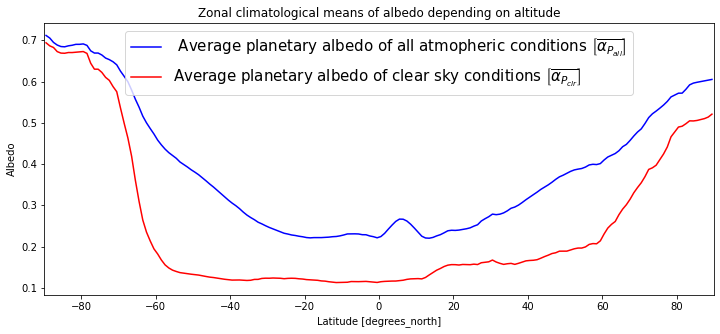

In [18]:
# to compute the zonal climatological means of clear air and all conditions we have to build it's mean along the logituntinal coordinate;
all_sky_avg_alb.mean(dim = "lon").plot(label = r" Average planetary albedo of all atmopheric conditions $\left[ \overline{\alpha_{P_{all}}} \right]$", color = "blue");
clr_sky_avg_alb.mean(dim = "lon").plot(label = r"Average planetary albedo of clear sky conditions $\left[ \overline{\alpha_{P_{clr}}} \right]$", color = "red");
plt.legend(loc = "best", prop = {"size" : 15} );
plt.ylabel("Albedo");
plt.title("Zonal climatological means of albedo depending on altitude");
plt.xlim(-90, 90);


Compute the global average of $\overline{\alpha_{P_{all}}}$ and $\overline{\alpha_{P_{clr}}}$ (remember to weight according to latitude!). Compare the values you obtain with the ones we mentioned in the lecture.

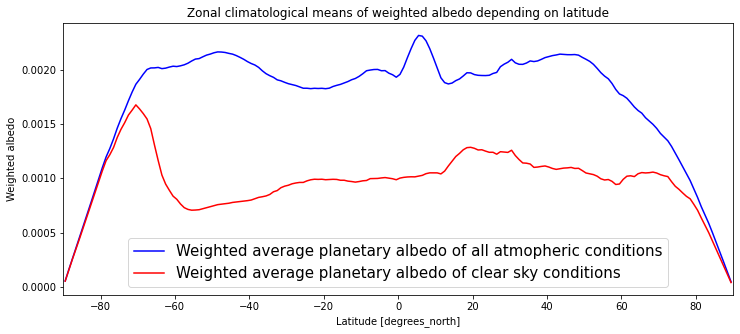

In [17]:
# computation and plotting of the weighted planetary albedo under clear sky and all atmospheric conditions; 
# computattion of weights: 
weight = np.cos(np.deg2rad(ds.lat))      # this is the formula to calc the earth surface as half a ball by using the lat coordinates; 
weights = weight / weight.sum()          # calc the relative input of every lat value calculated on the half surface ;

weighted_all_sky_avg_alb = all_sky_avg_alb*weights
weighted_clr_sky_avg_alb = clr_sky_avg_alb*weights
weighted_all_sky_avg_alb.mean(dim = "lon").plot(label = "Weighted average planetary albedo of all atmopheric conditions", color = "blue");
weighted_clr_sky_avg_alb.mean(dim = "lon").plot(label = "Weighted average planetary albedo of clear sky conditions", color = "red");
plt.legend(loc = "best", prop = {"size" : 15} );
plt.ylabel("Weighted albedo");
plt.title("Zonal climatological means of weighted albedo depending on latitude");
plt.xlim(-90, 90);



In [19]:
weighted_all_zone_alb = np.sum(weighted_all_sky_avg_alb.mean(dim = "lon"))
weighted_clr_zone_alb = np.sum(weighted_clr_sky_avg_alb.mean(dim = "lon"))
print("Weighted planetary albedo of all cond.:", np.round(weighted_all_zone_alb.item(), decimals = 2))
print("Weighted planetary albedo of clr sky cond.:", np.round(weighted_clr_zone_alb.item(), decimals = 2))

Weighted planetary albedo of all cond.: 0.31
Weighted planetary albedo of clr sky cond.: 0.17


these values of weighted albedo are similar to these mentioned in the lecture

### Longwave outgoing radiation 

Repeat the operations above with $LW_{all} $ and  $LW_{clr}$ (i.e.: maps of $\overline{LW_{all}}$, $\overline{LW_{clr}}$, line plots of $\left[ \overline{LW_{all}} \right]$, $\left[ \overline{LW_{clr}} \right]$). What is the global effect of clouds on outgoing longwave radiation?

In [14]:
# calculations for mean lw-radiation
all_sky_avg_lw = ds.toa_lw_all_clim.mean(dim = "month")
clr_sky_avg_lw = ds.toa_lw_clr_c_clim.mean(dim ="month")

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:982: ShapelyDeprecationWarning: Ite

Text(0.5, 1.0, 'Clear sky longwave outgoing radiation $\\overline{LW_{clr}}$')

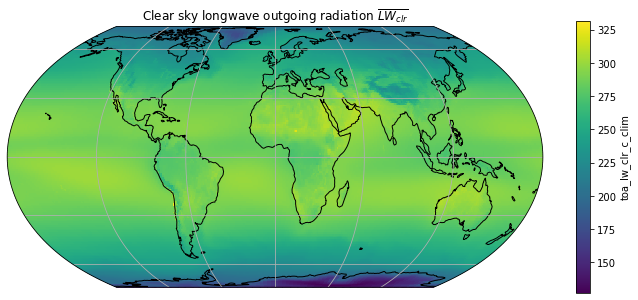

In [20]:
## Maps for Longwave clear sky conditions
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
clr_sky_avg_lw.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title(r'Clear sky longwave outgoing radiation $\overline{LW_{clr}}$')  # Add gridlines and coastlines to the plot

Text(0.5, 1.0, ' All conditions outgoing longwave radiation $\\overline{LW_{all}}$')

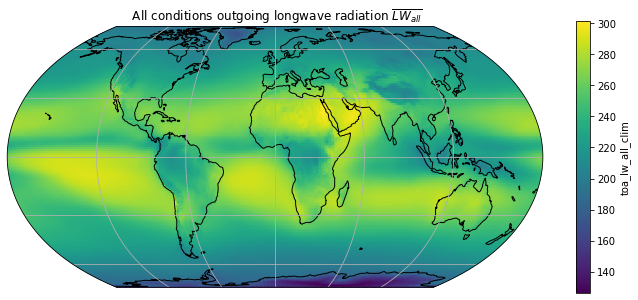

In [21]:
## Maps for Longwave all conditions
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
all_sky_avg_lw.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title(r' All conditions outgoing longwave radiation $\overline{LW_{all}}$') # Add gridlines and coastlines to the plot

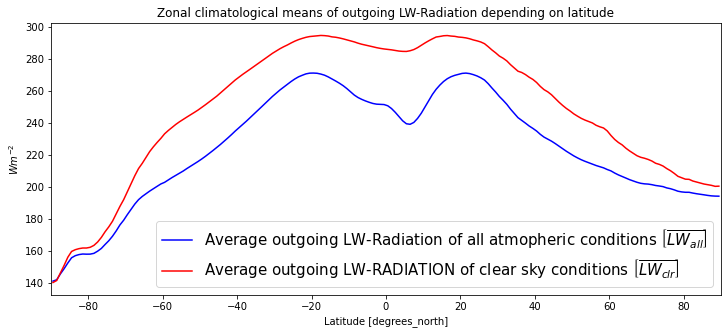

In [25]:
# to compute the zonal climatological means of clear air and all conditions we have to build it's mean along the logituntinal coordinate;
all_sky_avg_lw.mean(dim = "lon").plot(label = r"Average outgoing LW-Radiation of all atmopheric conditions $\left[ \overline{LW_{all}} \right]$", color = "blue");
clr_sky_avg_lw.mean(dim = "lon").plot(label = r"Average outgoing LW-RADIATION of clear sky conditions $\left[ \overline{LW_{clr}} \right]$", color = "red");
plt.legend(loc = "best", prop = {"size" : 15});
plt.ylabel(r"$W m^{-2}$");
plt.title("Zonal climatological means of outgoing LW-Radiation depending on latitude");
plt.xlim(-90, 90);

Clouds and moisture decrease the outgoing longwave radiation. Slightly little north of the equator these process is the most dominant. 
Polwards there is much less outgoing LW-Radiation because the earth surface temp. and atmosphere above is much lower, especially at the antarctic continent.  
On the other hand, the more clouds are the more incoming solar radiation is refelcted. So by comparing these two procedures clouds reflect some incoming solar radiation and absorb LW Radiation from the earth. 
In sum: low clouds (thicker) cool the atmosphere by reflecting more incoming solar radiation and keeping the LW-Radiativ Energy in teh lowest parts of the atmosphere whereas high (thinner) clouds warm the atmosphere by letting more solar radiation in and absorbing the LW-Radiation at much higher altitudes in the troposphere. 

## Surface fluxes 

Now open the EBAF-Surface dataset, available for download [here](https://www.dropbox.com/s/r0armbs8ip4op1f/CERES_EBAF-Surface_Ed4.1_Clim-2005-2015.nc?dl=1).

In [67]:
ds2 = xr.open_dataset(r'C:\Users\david\unixstuff\AtmosphericSciencesShare\ClimateSystem\Africa_MJM\LectureNotebooks\Week02\CERES_EBAF-Surface_Ed4.1_Clim-2005-2015.nc')
ds2

<xarray.Dataset>
Dimensions:                 (lon: 360, lat: 180, month: 12)
Coordinates:
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * month                   (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sfc_sw_down_all_clim    (month, lat, lon) float32 ...
    sfc_sw_down_clr_t_clim  (month, lat, lon) float32 ...
    sfc_sw_up_all_clim      (month, lat, lon) float32 ...
    sfc_sw_up_clr_t_clim    (month, lat, lon) float32 ...
    sfc_lw_down_all_clim    (month, lat, lon) float32 ...
    sfc_lw_down_clr_t_clim  (month, lat, lon) float32 ...
    sfc_lw_up_all_clim      (month, lat, lon) float32 ...
    sfc_lw_up_clr_t_clim    (month, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF_L3B004.1

### Surface albedo 

Compute the all-sky surface albedo $\overline{\alpha_{S_{all}}}$. Plot it on a map.

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:982: ShapelyDeprecationWarning: Ite

Text(0.5, 1.0, 'All-sky surface albedo ( $\\overline{\\alpha_{S_{all}}}$ all.)')

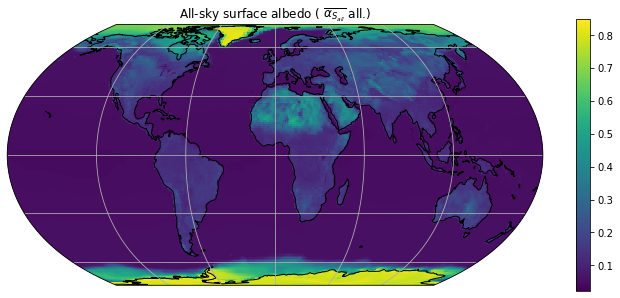

In [68]:
all_sky_avg_sfc_alb = ds2.sfc_sw_up_all_clim.mean(dim = "month")/ds2.sfc_sw_down_all_clim.mean(dim = "month")

# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
all_sky_avg_sfc_alb.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title(r'All-sky surface albedo ( $\overline{\alpha_{S_{all}}}$ all.)')# Add gridlines and coastlines to the plot

Compute the global average of $\overline{\alpha_{s}}$.

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:982: ShapelyDeprecationWarning: Ite

Text(0.5, 1.0, 'Clear-sky surface albedo ( $\\overline{\\alpha_{S_{clr}}}$ all.)')

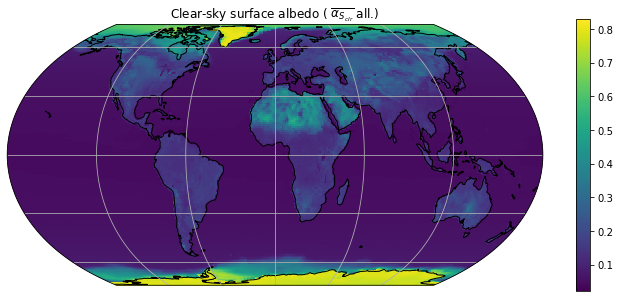

In [69]:
clr_sky_avg_sfc_alb = ds2.sfc_sw_up_clr_t_clim.mean(dim ="month")/ds2.sfc_sw_down_clr_t_clim.mean(dim = "month")

# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
clr_sky_avg_sfc_alb.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title(r'Clear-sky surface albedo ( $\overline{\alpha_{S_{clr}}}$ all.)')# Add gridlines and coastlines to the plot

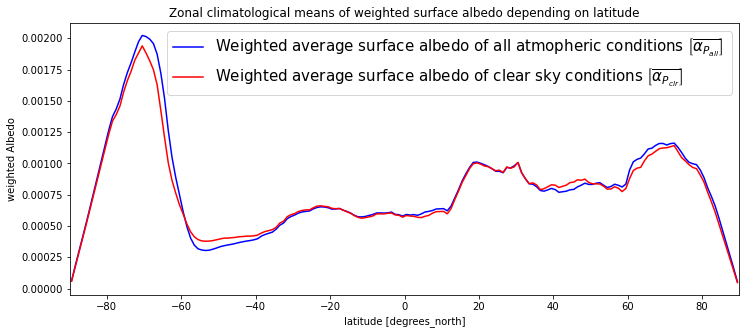

In [70]:
# computation and plotting of the weighted surf albedo under clear sky and all atmospheric conditions; 
# computattion of weights: 
weight = np.cos(np.deg2rad(ds.lat))      # this is the formula to calc the earth surface as half a ball by using the lat coordinates; 
weights = weight / weight.sum()          # calc the relative input of every lat value calculated on the half surface ;

weighted_all_sky_avg_sfc_alb = all_sky_avg_sfc_alb*weights
weighted_clr_sky_avg_sfc_alb = clr_sky_avg_sfc_alb*weights
weighted_all_sky_avg_sfc_alb.mean(dim = "lon").plot(label = r"Weighted average surface albedo of all atmopheric conditions $\left[ \overline{\alpha_{P_{all}}} \right]$ ", color = "blue");
weighted_clr_sky_avg_sfc_alb.mean(dim = "lon").plot(label = r"Weighted average surface albedo of clear sky conditions $\left[ \overline{\alpha_{P_{clr}}} \right]$ ", color = "red");
plt.legend(loc = "best", prop={"size":15});
plt.ylabel("weighted Albedo");
plt.title("Zonal climatological means of weighted surface albedo depending on latitude");
plt.xlim(-90, 90);


In [71]:
weighted_all_zone_sfc_alb = np.sum(weighted_all_sky_avg_sfc_alb.mean(dim = "lon"))
weighted_clr_zone_sfc_alb = np.sum(weighted_clr_sky_avg_sfc_alb.mean(dim = "lon"))
print("Weighted all cond. sfc albedo:",np.round(weighted_all_zone_sfc_alb.item(), decimals = 4))
print("Weighted clr sky sfc albedo:", np.round(weighted_clr_zone_sfc_alb.item(), decimals = 4))

Weighted all cond. sfc albedo: 0.1432
Weighted clr sky sfc albedo: 0.1405


### Surface energy balance

Now compute the net surface energy intake $\overline{SEB} =  \overline{SW_{in}} - \overline{SW_{out}} + \overline{LW_{in}} - \overline{LW_{out}}$. Plot it on a map and analyse your results. Where does the surface gain most energy? Is the net radiative energy a gain or a loss for the surface of the globe?

In [72]:
# SEB with clear sky condition:
SW_in = ds2.sfc_sw_down_clr_t_clim.mean(dim = "month")
SW_out = ds2.sfc_sw_up_clr_t_clim.mean(dim = "month")
LW_in = ds2.sfc_lw_down_clr_t_clim.mean(dim = "month")
LW_out = ds2.sfc_lw_up_clr_t_clim.mean(dim = "month")
SEB_clr_sky = SW_in - SW_out + LW_in - LW_out
SEB_clr_sky


<xarray.DataArray (lat: 180, lon: 360)>
array([[-23.311493, -23.311577, -23.311653, ..., -23.311592, -23.311623,
        -23.311714],
       [-26.794167, -26.794273, -26.79435 , ..., -26.794235, -26.794357,
        -26.794449],
       [-28.552399, -28.552368, -28.55243 , ..., -28.552414, -28.55249 ,
        -28.552505],
       ...,
       [-31.612839, -31.617355, -31.616241, ..., -31.613312, -31.615448,
        -31.612076],
       [-29.925598, -29.925903, -29.925995, ..., -29.924103, -29.924255,
        -29.92424 ],
       [-33.607895, -33.607697, -33.60768 , ..., -33.608017, -33.608078,
        -33.608124]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:982: ShapelyDeprecationWarning: Ite

Text(0.5, 1.0, 'Clear sky Surface energy balance')

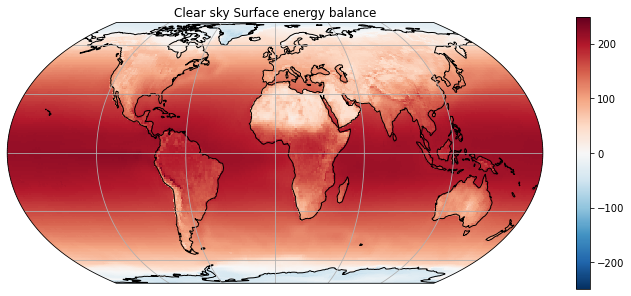

In [73]:
# Define theSEBmap projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
SEB_clr_sky.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title('Clear sky Surface energy balance')# Add gridlines and coastlines to the plot

In [74]:
# SEB with all conditions: 
SW_in_all = ds2.sfc_sw_down_all_clim.mean(dim = "month")
SW_out_all = ds2.sfc_sw_up_all_clim.mean(dim = "month")
LW_in_all = ds2.sfc_lw_down_all_clim.mean(dim = "month")
LW_out_all = ds2.sfc_lw_up_all_clim.mean(dim = "month")
SEB_all = SW_in_all - SW_out_all + LW_in_all - LW_out_all
SEB_all


<xarray.DataArray (lat: 180, lon: 360)>
array([[-7.5823975e-01, -7.5823975e-01, -7.5823975e-01, ...,
        -7.5823975e-01, -7.5823975e-01, -7.5823975e-01],
       [-4.4395142e+00, -4.4395142e+00, -4.4395142e+00, ...,
        -4.4395142e+00, -4.4395142e+00, -4.4395142e+00],
       [-6.1353912e+00, -6.1353912e+00, -6.1353912e+00, ...,
        -6.1353912e+00, -6.1353912e+00, -6.1353912e+00],
       ...,
       [ 5.7507172e+00,  5.7507172e+00,  5.7507172e+00, ...,
         5.7507172e+00,  5.7507172e+00,  5.7507172e+00],
       [ 2.6828918e+00,  2.6828918e+00,  2.6828918e+00, ...,
         2.6828918e+00,  2.6828918e+00,  2.6828918e+00],
       [ 7.6293945e-04,  7.6293945e-04,  7.6293945e-04, ...,
         7.6293945e-04,  7.6293945e-04,  7.6293945e-04]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:982: ShapelyDeprecationWarning: Ite

Text(0.5, 1.0, 'All sky Surface energy balance')

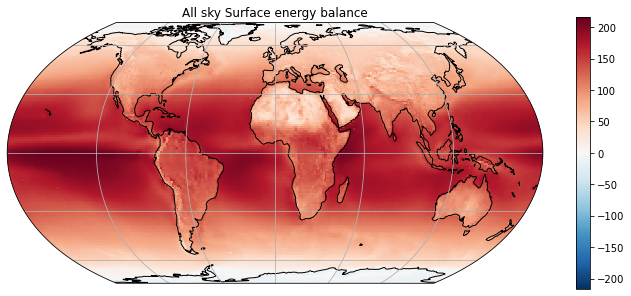

In [75]:
# Define theSEBmap projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
SEB_all.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title('All sky Surface energy balance')# Add gridlines and coastlines to the plot

Text(0.5, 1.0, 'Differece in Surface energy balance')

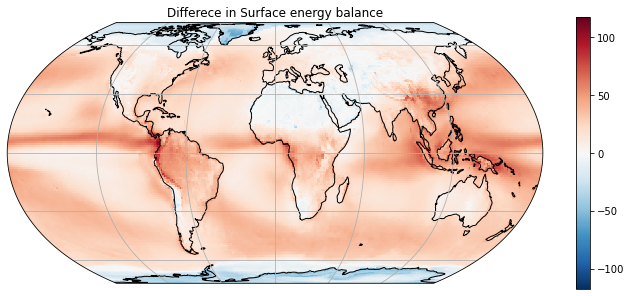

In [76]:
delta_SEB = SEB_clr_sky - SEB_all

# Define theSEBmap projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
delta_SEB.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); plt.title('Differece in Surface energy balance') # Add gridlines and coastlines to the plot

Compute the global averages of each term and compare them to the values we discussed in the lecture ([ref](https://www.cgd.ucar.edu/staff/trenbert/trenberth.papers/BAMSmarTrenberth.pdf)). For reference, here is the figure again:

<img src="http://www.skepticalscience.com/pics/Figure1.png" width="50%">

In [90]:
print(341-(78+79))
print(184-23)
print(

184
161


161

In [121]:
SW_in = ds2.sfc_sw_down_all_clim.mean(dim='month').mean(dim='lon');
SW_in_w = np.sum(SW_in*weights);
print('Shortwave incoming flux =', np.round(SW_in_w.item()), 'W m-2');

SW_out = ds2.sfc_sw_up_all_clim.mean(dim='month').mean(dim='lon');
SW_out_w = np.sum(SW_out*weights);
print('Shortwave outgoing flux =', np.round(SW_out_w.item()), 'W m-2');

LW_in = ds2.sfc_lw_down_all_clim.mean(dim='month').mean(dim='lon');
LW_in_w = np.sum(LW_in*weights);
print('Longwave incoming flux =', np.round(LW_in_w.item()), 'W m-2');

LW_out = ds2.sfc_lw_up_all_clim.mean(dim='month').mean(dim='lon');
LW_out_w = np.sum(LW_out*weights);
print('Longwave outgoing flux =', np.round(LW_out_w.item()), 'W m-2');


SEB = SW_in_w - SW_out_w + LW_in_w - LW_out_w
print(SEB)

Shortwave incoming flux = 187.0 W m-2
Shortwave outgoing flux = 23.0 W m-2
Longwave incoming flux = 345.0 W m-2
Longwave outgoing flux = 399.0 W m-2
<xarray.DataArray ()>
array(110.05234, dtype=float32)


In [117]:
SW_in_clr = ds2.sfc_sw_down_clr_t_clim.mean(dim='month').mean(dim='lon');
SW_in_clr_w = np.sum(SW_in_clr*weights);
print('Shortwave incoming flux clr sky =', np.round(SW_in_clr_w.item()), 'W m-2');

SW_out_clr = ds2.sfc_sw_up_clr_t_clim.mean(dim='month').mean(dim='lon');
SW_out_clr_w = np.sum(SW_out_clr*weights);
print('Shortwave outgoing flux clr sky =', np.round(SW_out_clr_w.item()), 'W m-2');

LW_in_clr = ds2.sfc_lw_down_clr_t_clim.mean(dim='month').mean(dim='lon');
LW_in_clr_w = np.sum(LW_in_clr*weights);
print('Longwave incoming flux clr sky =', np.round(LW_in_clr_w.item()), 'W m-2');

LW_out_clr = ds2.sfc_lw_up_clr_t_clim.mean(dim='month').mean(dim='lon');
LW_out_clr_w = np.sum(LW_out_clr*weights);
print('Longwave outgoing flux clr sky=', np.round(LW_out_clr_w.item()), 'W m-2');


Shortwave incoming flux clr sky = 241.0 W m-2
Shortwave outgoing flux clr sky = 29.0 W m-2
Longwave incoming flux clr sky = 317.0 W m-2
Longwave outgoing flux clr sky= 398.0 W m-2


In [116]:
zonal_solar=ds.solar_clim.mean(dim='month').mean(dim='lon');
solar_w=np.sum(zonal_solar*weights);
print('Incoming solar radiation =', np.round(solar_w.item()), 'W m-2');

zonal_swup=ds.toa_sw_all_clim.mean(dim='month').mean(dim='lon');
swup_w=np.sum(zonal_swup*weights);
print('Reflected solar radiation =', np.round(swup_w.item()), 'W m-2');

zonal_lwup=ds.toa_lw_all_clim.mean(dim='month').mean(dim='lon');
lwup_w=np.sum(zonal_lwup*weights);
print('Outgoing longwave flux =', np.round(lwup_w.item()), 'W m-2');

Incoming solar radiation = 340.0 W m-2
Reflected solar radiation = 99.0 W m-2
Outgoing longwave flux = 240.0 W m-2


**Discuss the processes that will counterbalance this net radiative energy imbalance, in the oceans and on land! Also discuss the differences between your results and the plot above.** (Careful literature search might lead you to more recent estimates of the budget if you are interested).

Incoming Shortwave radiation depends on how much clouds there are, which gases and aerosols are in atm and their amount, so they can reflect or absorb incoming solar radiation. Our model doesn't use aerosols and gases in Atm at some point, so incoming solar radiation is slightly overestimated at the ground in our model.
On the other side the outgoing solar radiation is too big in our model. Maybe it doesn't take the absorbtion and forward scattering of aerosols and gases into account. 

For the longwave radiation the outgoing values are quite at our astimation on the picture above. 

The incoming longwave radiation is too low because our model doesn't take the effect of moisture and all the greenhouse gases which warm the troposphere.

-> We have energy transport from ocean to land surface where it can radiate back to space. (moisture transport from ocean to land); 

-> Dry static energy transport from land to ocean (

